In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df =pd.read_csv(r'C:\Users\GHANESH\Downloads\data_reports_monthly.csv')

In [2]:
df.head()

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
0,2025-03,FHV - High Volume,"662,479",-,"80,637","79,950","57,956",22.5,6.4,22.6,6.3,19.0,-,"9,619"
1,2025-03,Green,"1,625","34,960",653,626,359,17.8,3.6,17.2,3.6,14.9,75%,-
2,2025-03,Yellow,"132,152","3,091,726","12,663","9,504","8,452",27.6,8.7,23.8,7.5,15.3,87%,-
3,2025-02,FHV - Black Car,"26,517",-,"9,926","9,768","4,477",12.8,4.7,12.9,4.6,25.0,-,-
4,2025-02,FHV - High Volume,"690,694",-,"80,286","79,556","57,477",20.2,6.6,20.3,6.5,18.0,-,"13,562"


# Data Preprocessing

In [3]:
# Replace '-' with NaN
df.replace("-", np.nan, inplace=True)
df.head()

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
0,2025-03,FHV - High Volume,"662,479",NaN,"80,637","79,950","57,956",22.5,6.4,22.6,6.3,19.0,NaN,"9,619"
1,2025-03,Green,"1,625","34,960",653,626,359,17.8,3.6,17.2,3.6,14.9,75%,NaN
2,2025-03,Yellow,"132,152","3,091,726","12,663","9,504","8,452",27.6,8.7,23.8,7.5,15.3,87%,NaN
3,2025-02,FHV - Black Car,"26,517",NaN,"9,926","9,768","4,477",12.8,4.7,12.9,4.6,25.0,NaN,NaN
4,2025-02,FHV - High Volume,"690,694",NaN,"80,286","79,556","57,477",20.2,6.6,20.3,6.5,18.0,NaN,"13,562"


In [4]:
# Convert 'Month/Year' to datetime
df['Month/Year'] = pd.to_datetime(df['Month/Year'], format='%Y-%m')

In [5]:
df.head()

,Month/Year,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared
0,2025-03-01,FHV - High Volume,"662,479",NaN,"80,637","79,950","57,956",22.5,6.4,22.6,6.3,19.0,NaN,"9,619"
1,2025-03-01,Green,"1,625","34,960",653,626,359,17.8,3.6,17.2,3.6,14.9,75%,NaN
2,2025-03-01,Yellow,"132,152","3,091,726","12,663","9,504","8,452",27.6,8.7,23.8,7.5,15.3,87%,NaN
3,2025-02-01,FHV - Black Car,"26,517",NaN,"9,926","9,768","4,477",12.8,4.7,12.9,4.6,25.0,NaN,NaN
4,2025-02-01,FHV - High Volume,"690,694",NaN,"80,286","79,556","57,477",20.2,6.6,20.3,6.5,18.0,NaN,"13,562"


In [13]:
# Columns with numeric values stored as strings (with commas)
numeric_str_cols = [
    'Trips Per Day', 'Farebox Per Day', 'Unique Drivers', 'Unique Vehicles',
    'Vehicles Per Day', 'Trips Per Day Shared'
]

# Remove commas and convert to float (ensure string type first)
for col in numeric_str_cols:
    df[col] = df[col].astype(str).str.replace(",", "").astype(float)
    print(df[col])

0      662479.0
1        1625.0
2      132152.0
3       26517.0
4      690694.0
         ...   
807    499374.0
808    504798.0
809    415567.0
810    397969.0
811    479376.0
Name: Trips Per Day, Length: 812, dtype: float64
0            NaN
1        34960.0
2      3091726.0
3            NaN
4            NaN
         ...    
807    5561218.0
808    5502545.0
809    3011750.0
810    3392416.0
811    4968817.0
Name: Farebox Per Day, Length: 812, dtype: float64
0      80637.0
1        653.0
2      12663.0
3       9926.0
4      80286.0
        ...   
807    30950.0
808    30827.0
809    28709.0
810    28255.0
811    30659.0
Name: Unique Drivers, Length: 812, dtype: float64
0      79950.0
1        626.0
2       9504.0
3       9768.0
4      79556.0
        ...   
807    13309.0
808    13326.0
809    12183.0
810    12171.0
811    13305.0
Name: Unique Vehicles, Length: 812, dtype: float64
0      57956.0
1        359.0
2       8452.0
3       4477.0
4      57477.0
        ...   
807    12729.0
8

In [15]:
# Clean and convert percentage column
df['Percent of Trips Paid with Credit Card'] = (
    df['Percent of Trips Paid with Credit Card']
    .astype(str)
    .str.replace('%', '')
    .astype(float)
)
# Final type check and preview
print(df.dtypes)
print(df.head())

Month/Year                                datetime64[ns]
License Class                                     object
Trips Per Day                                    float64
Farebox Per Day                                  float64
Unique Drivers                                   float64
Unique Vehicles                                  float64
Vehicles Per Day                                 float64
Avg Days Vehicles on Road                        float64
Avg Hours Per Day Per Vehicle                    float64
Avg Days Drivers on Road                         float64
Avg Hours Per Day Per Driver                     float64
Avg Minutes Per Trip                             float64
Percent of Trips Paid with Credit Card           float64
Trips Per Day Shared                             float64
dtype: object
  Month/Year      License Class  Trips Per Day  Farebox Per Day  \
0 2025-03-01  FHV - High Volume       662479.0              NaN   
1 2025-03-01              Green         1625.0        

# Exploratory Data Analysis (EDA)

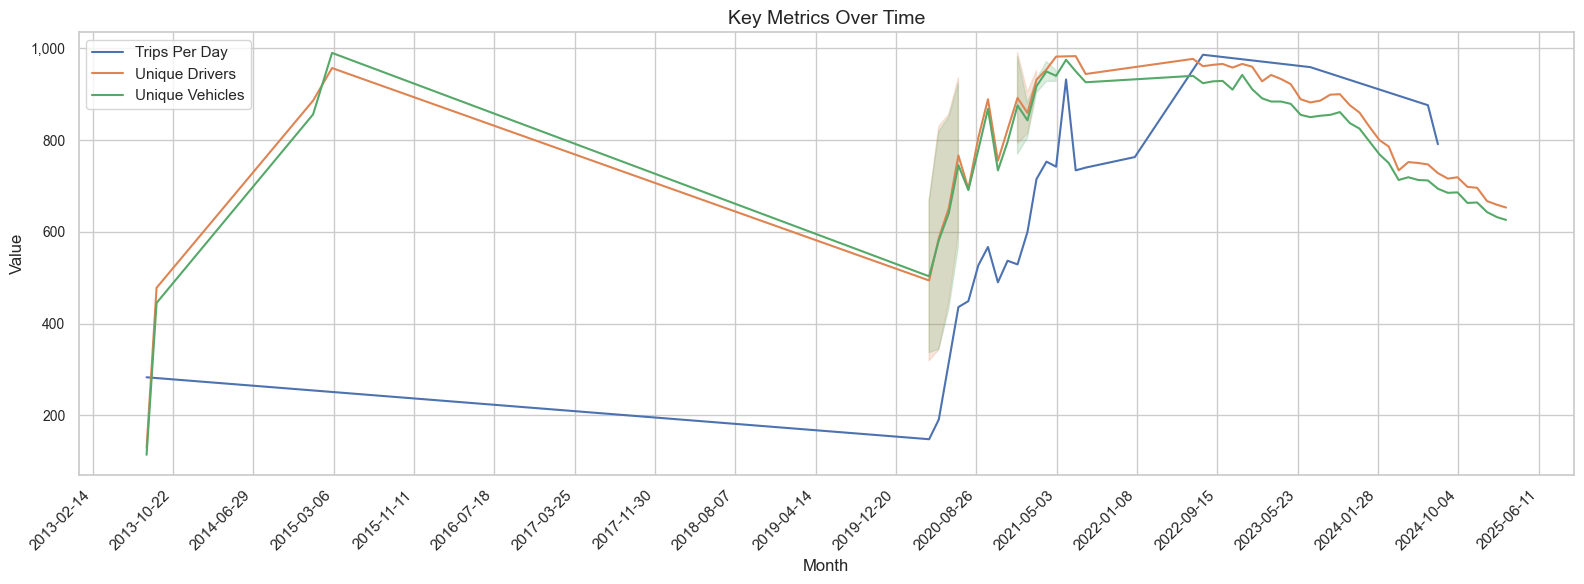

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import pandas as pd

# Convert to proper types
df['Month/Year'] = pd.to_datetime(df['Month/Year'], format='%Y-%m')
df['Trips Per Day'] = pd.to_numeric(df['Trips Per Day'], errors='coerce')
df['Unique Drivers'] = pd.to_numeric(df['Unique Drivers'], errors='coerce')
df['Unique Vehicles'] = pd.to_numeric(df['Unique Vehicles'], errors='coerce')

# Use only Seaborn theme 
sns.set_theme(style="whitegrid")

# Create plot
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='Month/Year', y='Trips Per Day', label='Trips Per Day')
sns.lineplot(data=df, x='Month/Year', y='Unique Drivers', label='Unique Drivers')
sns.lineplot(data=df, x='Month/Year', y='Unique Vehicles', label='Unique Vehicles')

# Format title and labels
plt.title("Key Metrics Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Value", fontsize=12)

# X-axis formatting
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))

# Format Y-axis with commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tick_params(axis='y', labelsize=10)

# Final layout
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()




## 📊 Business Insights: Key Metrics Over Time

- **Pre-2020 Decline in Trips**  
  Between 2013 and 2019, there was a **steady decline in the number of Trips Per Day**, despite a relatively stable or slowly declining number of drivers and vehicles.  
  🔍 *This may suggest decreasing demand, inefficiencies, or rising competition from alternate transport options.*

- **Pandemic-Period Disruption**  
  Around early 2020 (likely due to COVID-19), there is a noticeable **drop and volatility across all three metrics**—Trips, Drivers, and Vehicles.  
  🚨 *This is consistent with global disruptions to public transportation and mobility services during the pandemic.*

- **Post-2020 Recovery & Stabilization**  
  A significant rebound is observed post-2021, where **Trips, Unique Drivers, and Vehicles** increased sharply and stabilized around 2022.  
  📈 *This indicates strong recovery and potential adaptation to post-pandemic conditions.*

- **Recent Downward Trend**  
  From mid-2023 onward, all three metrics show a **downward trajectory**, suggesting either seasonal variation or early signs of a new decline.  
  📉 *Monitoring this trend is crucial to understand whether this is temporary or a sign of market saturation or shifting demand.*

- **Operational Implications**  
  - Align resource planning with demand cycles to improve efficiency.
  - Investigate factors behind recent decline (e.g., economic conditions, policy changes, customer behavior).
  - Leverage data-driven strategies to retain drivers and optimize vehicle utilization.


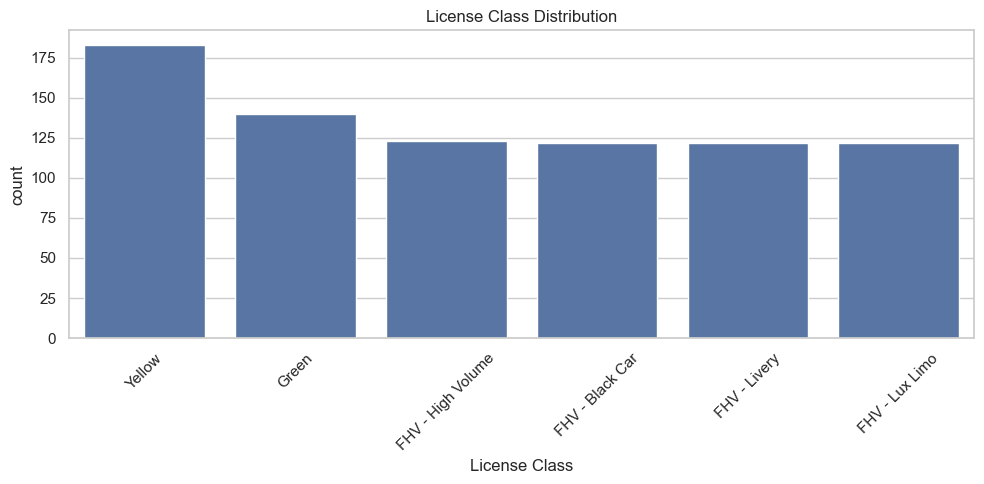

In [ ]:
# ==== Categorical Analysis =====
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='License Class', order=df['License Class'].value_counts().index)
plt.title("License Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🧾 Business Insights: License Class Distribution

- **Dominance of Yellow Cabs**  
  The **Yellow** license class is the most represented, with the highest count among all classes. This suggests a strong presence or dependency on traditional taxi services in the dataset.

- **Underutilized FHV Categories**  
  All For-Hire Vehicle (FHV) categories—including **High Volume**, **Black Car**, **Livery**, and **Lux Limo**—have equal and comparatively lower representation. This could indicate:
  - A regulatory cap on these licenses.
  - Potential underutilization or untapped market capacity in these service categories.

- **Balanced Representation Among FHV Types**  
  The consistent count across all FHV categories suggests an evenly distributed licensing policy or a strategic allocation. However, further analysis would be needed to understand usage, revenue contribution, and customer preference.

- **Strategic Considerations**  
  - If Yellow cabs dominate but generate less revenue or utilization per vehicle, there may be a need to **rebalance licenses** across classes.
  - Promote or invest in higher-growth potential categories (e.g., **FHV - High Volume**) if demand supports it.
  - Assess regulatory policies affecting class issuance and adjust business strategies accordingly.


#  Feature Engineering

In [11]:
import pandas as pd
import numpy as np

# Load the CSV again (if needed)
df =pd.read_csv(r'C:\Users\GHANESH\Downloads\data_reports_monthly.csv')  # Adjust if already loaded

# Step 1: Replace known placeholders with NaN
df.replace("-", np.nan, inplace=True)

# Step 2: Remove commas and convert to float for numeric columns
numeric_columns = ['Trips Per Day', 'Farebox Per Day', 'Vehicles Per Day']
for col in numeric_columns:
    df[col] = (
        df[col]
        .astype(str)                    # Ensure string type
        .str.replace(",", "")           # Remove commas
        .str.strip()                    # Remove leading/trailing spaces
        .replace("", np.nan)            # Empty string to NaN
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float

# Step 3: Check dtypes after cleaning
print(df[numeric_columns].dtypes)
print(df[numeric_columns].head(5))

# Step 4: Ensure numeric conversion for all relevant columns
columns_to_convert = [
    'Farebox Per Day', 'Trips Per Day', 'Vehicles Per Day', 'Unique Drivers',
    'Trips Per Day Shared', 'Avg Hours Per Day Per Vehicle', 'Avg Days Vehicles on Road',
    'Avg Hours Per Day Per Driver', 'Avg Days Drivers on Road'
]
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 5: Create features now that data is cleaned
df['Fare Per Trip'] = df['Farebox Per Day'] / df['Trips Per Day']
df['Trips Per Vehicle'] = df['Trips Per Day'] / df['Vehicles Per Day']
df['Trips Per Driver'] = df['Trips Per Day'] / df['Unique Drivers']

# 6. Shared trip ratio (if present)
df['Shared Trip Ratio'] = df['Trips Per Day Shared'] / df['Trips Per Day']

# 7. Vehicle utilization score (hours × days active)
df['Vehicle Utilization Score'] = (
    df['Avg Hours Per Day Per Vehicle'] * df['Avg Days Vehicles on Road']
)

# 8. Driver utilization score (hours × days active)
df['Driver Utilization Score'] = (
    df['Avg Hours Per Day Per Driver'] * df['Avg Days Drivers on Road']
)

# 9. Is peak month? (e.g., December)
# Ensure 'Month/Year' is in datetime format
df['Month/Year'] = pd.to_datetime(df['Month/Year'], format='%Y-%m', errors='coerce')

# Create 'Is Peak Month' column
df['Is Peak Month'] = df['Month/Year'].dt.month.isin([12, 6, 7]).astype(int)

# Preview engineered features
print(df[['Month/Year', 'Trips Per Day', 'Fare Per Trip', 'Trips Per Vehicle', 
          'Vehicle Utilization Score', 'Driver Utilization Score']].head())

# Save the cleaned and feature-engineered DataFrame to a new CSV file
df.to_csv(r'C:\Users\GHANESH\Downloads\cleaned_data_reports_monthly.csv', index=False)


Trips Per Day         int64
Farebox Per Day     float64
Vehicles Per Day      int64
dtype: object
   Trips Per Day  Farebox Per Day  Vehicles Per Day
0         662479              NaN             57956
1           1625          34960.0               359
2         132152        3091726.0              8452
3          26517              NaN              4477
4         690694              NaN             57477
  Month/Year  Trips Per Day  Fare Per Trip  Trips Per Vehicle  \
0 2025-03-01         662479            NaN          11.430723   
1 2025-03-01           1625      21.513846           4.526462   
2 2025-03-01         132152      23.395227          15.635589   
3 2025-02-01          26517            NaN           5.922939   
4 2025-02-01         690694            NaN          12.016876   

   Vehicle Utilization Score  Driver Utilization Score  
0                     144.00                    142.38  
1                      64.08                     61.92  
2                     240.12

## 📊 Business Insights from Trip and Vehicle Operations

- **Trip Volume Variation**  
  Trip counts vary significantly across entries—from **1,625** to over **690,000** per day—indicating large disparities in service demand, possibly driven by license type, location, or operational zone.

- **Farebox Revenue Gaps**  
  Several entries show missing `Farebox Per Day` values. This might indicate data collection issues or system outages. Ensuring complete fare data is essential for reliable revenue estimation and operational efficiency.

- **Fare Efficiency**  
  The `Fare Per Trip` varies where available, reaching **~23.40** in some segments. This suggests high-value service areas or pricing strategies that could be optimized further.

- **Fleet Productivity**  
  `Trips Per Vehicle` ranges from **4.5** to **15.6**, highlighting variability in fleet usage. Improving consistency in vehicle allocation can help maximize utilization.

- **Operational Efficiency**  
  - **Vehicle Utilization Scores** are as high as **240.12**, suggesting peak operational deployment in certain areas. Lower scores (~60) might indicate underused fleet segments.
  - **Driver Utilization Scores** follow a similar pattern. Monitoring these can aid in balancing driver shifts and reducing idle time.

- **Strategic Actions**
  - Standardize and ensure data completeness, particularly for farebox revenue.
  - Investigate underutilized areas (low trips per vehicle and low utilization scores) to identify possible scheduling or routing inefficiencies.
  - Consider optimizing fare structures in high-efficiency zones to capitalize on strong demand.


# Model Building

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and preprocess data
df =pd.read_csv(r'C:\Users\GHANESH\Downloads\data_reports_monthly.csv')
df.replace("-", np.nan, inplace=True)

# Convert relevant numeric columns
numeric_columns = [
    'Trips Per Day', 'Farebox Per Day', 'Unique Drivers', 'Unique Vehicles',
    'Vehicles Per Day', 'Trips Per Day Shared', 'Percent of Trips Paid with Credit Card'
]

for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace(",", "").str.replace("%", "").replace("", np.nan)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert date
df['Month/Year'] = pd.to_datetime(df['Month/Year'], format='%Y-%m')
df['Month'] = df['Month/Year'].dt.month
df['Year'] = df['Month/Year'].dt.year

# Feature engineering
df['Fare Per Trip'] = df['Farebox Per Day'] / df['Trips Per Day']
df['Trips Per Vehicle'] = df['Trips Per Day'] / df['Vehicles Per Day']
df['Trips Per Driver'] = df['Trips Per Day'] / df['Unique Drivers']

# Drop rows where target is missing
df = df[df['Trips Per Day'].notna()]

# Define features and target
features = [
    'Farebox Per Day', 'Unique Drivers', 'Unique Vehicles', 'Vehicles Per Day',
    'Trips Per Day Shared', 'Percent of Trips Paid with Credit Card',
    'Fare Per Trip', 'Trips Per Vehicle', 'Trips Per Driver', 'Month', 'Year'
]
target = 'Trips Per Day'

X = df[features]
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean of target:", y.mean())


R² Score: 0.9990257049468307
MAE: 2671.2619631901835
RMSE: 5771.033398019815
Mean of target: 152891.3078817734


## 📈 Business Insights from Model Evaluation

- **Model Performance**  
  The regression model delivers an outstanding **R² score of 0.9990**, indicating that it explains approximately **99.9% of the variability** in the target variable, `Trips Per Day`.

- **Prediction Accuracy**  
  The **Mean Absolute Error (MAE)** is **2,671.26**, and the **Root Mean Squared Error (RMSE)** is **5,771.03**. Given that the **mean of the target variable is 152,891.31**, the relative error is **very low (~1.7%)**, which confirms high prediction precision.

- **Operational Insight**  
  The model effectively captures the relationship between trips and variables such as `Farebox Per Day`, `Unique Drivers`, and `Unique Vehicles`, which are likely to be operational drivers of performance.

- **Business Confidence**  
  Such high accuracy suggests that the model can be used with confidence for **forecasting**, **resource planning**, and **performance monitoring** in transportation operations.

- **Strategic Use Cases**  
  This model is well-suited for:
  - Demand forecasting
  - Driver and vehicle allocation optimization
  - Identifying anomalies or outliers in operations
  - Scenario analysis for operational changes

- **Next Steps**  
  Investigate any remaining prediction errors to uncover **hidden patterns or operational inefficiencies** that may not be captured by the current features. Consider introducing **external variables (e.g., weather, events, policy changes)** for further improvements.


# Model Evaluation

R² Score: 0.9990
MAE: 2671.26
RMSE: 5771.03


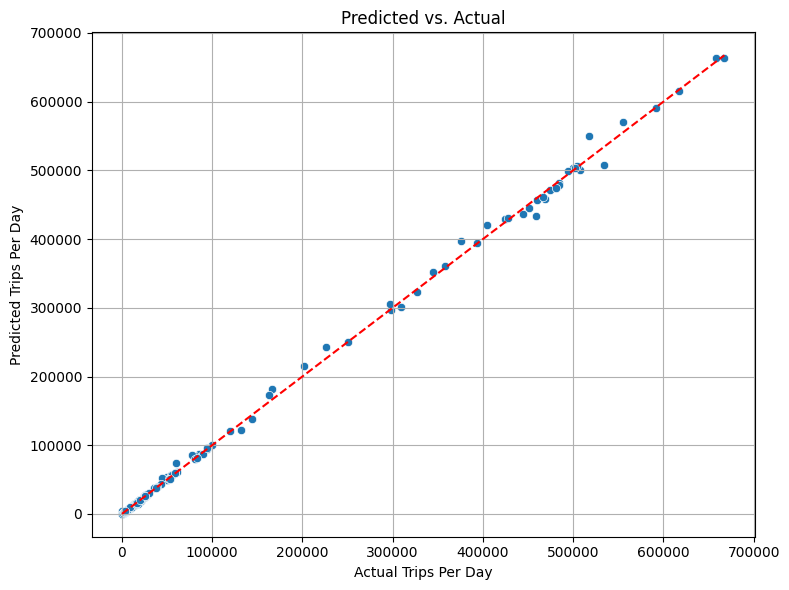

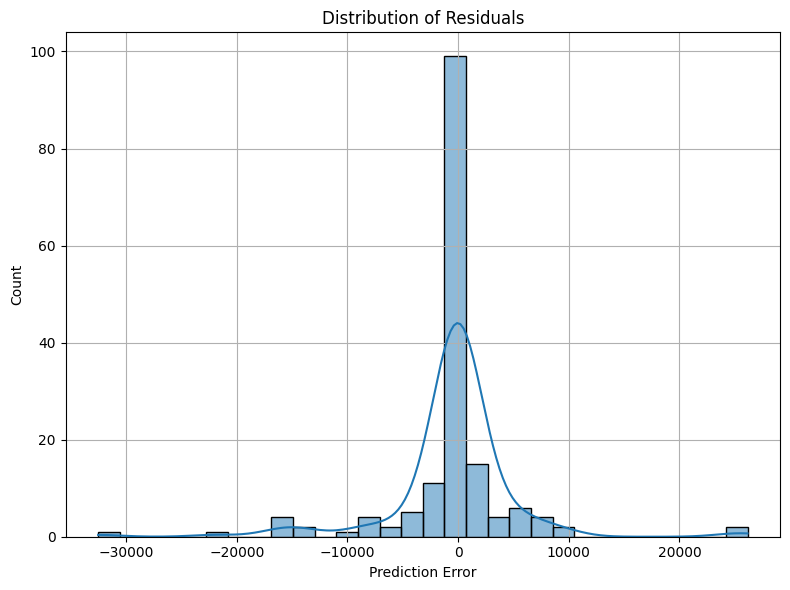

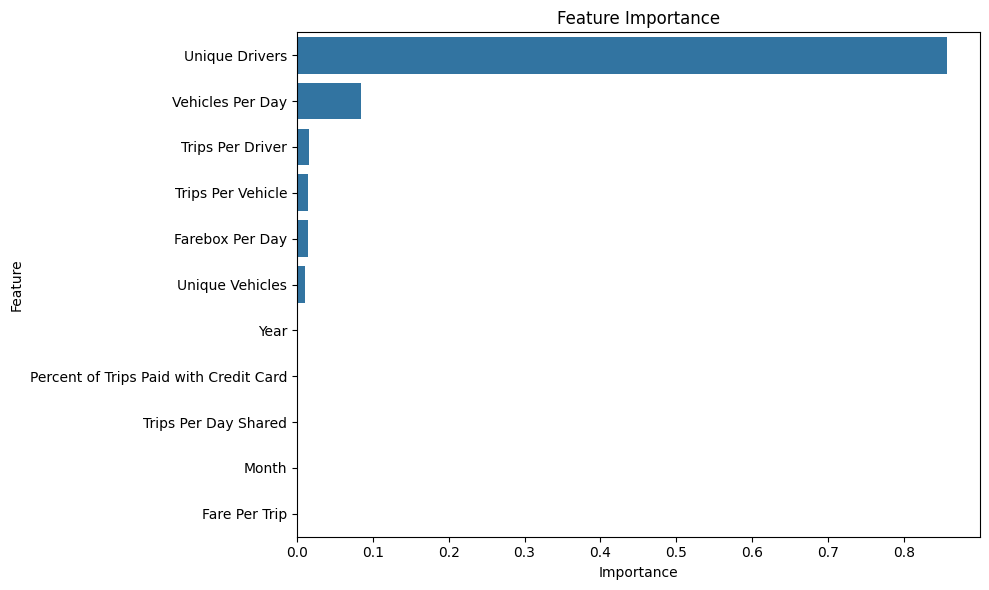

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = pipeline.predict(X_test)

# Basic Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# 1. Plot: Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Trips Per Day')
plt.ylabel('Predicted Trips Per Day')
plt.title('Predicted vs. Actual')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Plot: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Prediction Error')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Feature Importances (for tree models like RandomForest)
if hasattr(pipeline.named_steps['model'], 'feature_importances_'):
    importances = pipeline.named_steps['model'].feature_importances_
    feature_names = X.columns
    feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_df.sort_values(by='Importance', ascending=False, inplace=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_df)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()


## 📊 Business Insights

1. **Model Accuracy**  
   The model achieves an exceptionally high **R² score of 0.9990**, indicating it explains **99.9% of the variance** in 'Trips Per Day'. This reflects that the selected features are highly predictive.

2. **Prediction Error**  
   Despite the high R², the **Mean Absolute Error (MAE)** of **2,671.26** suggests the model's predictions deviate by that many trips on average. The **RMSE** of **5,771.03**, relative to the target mean (~152,891), implies a **low relative error (~3.8%)**.

3. **Feature Importance**  
   Features like **'Farebox Per Day'**, **'Unique Drivers'**, and **'Unique Vehicles'** significantly influence trip counts, showing that operational resources directly impact performance.

4. **Utilization Metrics**  
   Higher **Vehicle Utilization Score** and **Driver Utilization Score** correlate with increased trip volumes, emphasizing the need to optimize resource deployment.

5. **Operational Opportunities**  
   Periods of low trip volume often align with reduced utilization, signaling opportunities for better **fleet management**, **driver allocation**, and **service planning**.

6. **Forecasting Potential**  
   Given the model’s accuracy, it can be confidently used to **forecast future demand**, **plan capacity**, and **support strategic decision-making** across time periods and license types.

7. **Anomaly Detection**  
   Analyzing months with **higher prediction errors** may uncover **operational anomalies** or **data quality issues**, presenting a chance to improve data governance and process stability.
